## Configuração do Jupyter Nootebok

In [41]:
from IPython.display import display, HTML
from IPython.display import display, Markdown
display(HTML("<style>.container { width:90% !important; }</style>"))

## Pacotes Utilizados

In [42]:
import pyspedas
import numpy as np
import matplotlib.pyplot as plt
params = {'tex.usetex': True}
import matplotlib.dates as md

from pytplot import get_data,store_data, timebar,tplot, tplot_names
from pyspedas import time_string, time_double, mms
from pyspedas.mms import curlometer 
from matplotlib.colors import LogNorm
from datetime import datetime 

import pandas as pd
from pandas import Series, DataFrame

# Magic commands 
#https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics

%matplotlib inline
%matplotlib notebook

* https://github.com/spedas/pyspedas

## Configurações  

In [43]:
start_time = '2015-10-07/11:30:00'
end_time   = '2015-10-07/12:00:00'

ttext = start_time.split('/')

probe = ['1','2','3','4']
datatype=['dis-moms','des-moms']
t_clip = 'True'

data_rate_fgm = 'srvy'
data_rate_fpi = 'fast'

cgeo = 'gse'

## Carregamentos dos instrumentos da MMS

In [44]:
var_mec = ['mms1_mec_r_'+cgeo, 
           'mms2_mec_r_'+cgeo, 
           'mms3_mec_r_'+cgeo, 
           'mms4_mec_r_'+cgeo]

var_fpi = ['mms1_dis_numberdensity_'+data_rate_fpi,
           'mms1_dis_bulkv_'+cgeo+'_'+data_rate_fpi, 
           'mms1_dis_energyspectr_omni_'+data_rate_fpi,
           'mms1_des_tempperp_'+data_rate_fpi,'mms1_des_temppara_'+data_rate_fpi,
           'mms1_dis_tempperp_'+data_rate_fpi, 'mms1_dis_temppara_'+data_rate_fpi]

var_fgm = ['mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2',
           'mms2_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 
           'mms3_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 
           'mms4_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2']

var_edp = ['mms1_edp_dce_'+cgeo+'_'+data_rate_fpi+'_l2'] 

### MEC - Magnetic Ephemeris Coordinates

* https://pyspedas.readthedocs.io/en/latest/mms.html#magnetic-ephemeris-coordinates-mec

In [45]:
pyspedas.mms.mec(trange=[start_time,end_time] , probe=probe, varnames = var_mec  , time_clip=t_clip)

20-Jul-23 15:29:57: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\10\mms1_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
20-Jul-23 15:29:57: Loading pydata\mms2\mec\srvy\l2\epht89q\2015\10\mms2_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
20-Jul-23 15:29:58: Loading pydata\mms3\mec\srvy\l2\epht89q\2015\10\mms3_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
20-Jul-23 15:29:58: Loading pydata\mms4\mec\srvy\l2\epht89q\2015\10\mms4_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
20-Jul-23 15:29:58: Time clip was applied to: mms1_mec_r_gse
20-Jul-23 15:29:58: Time clip was applied to: mms2_mec_r_gse
20-Jul-23 15:29:58: Time clip was applied to: mms3_mec_r_gse
20-Jul-23 15:29:58: Time clip was applied to: mms4_mec_r_gse
20-Jul-23 15:29:58: Loaded variables:
20-Jul-23 15:29:58: mms1_mec_r_gse
20-Jul-23 15:29:58: mms2_mec_r_gse
20-Jul-23 15:29:58: mms3_mec_r_gse
20-Jul-23 15:29:58: mms4_mec_r_gse


['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 'mms4_mec_r_gse']

### FGM - Fluxgate Magnetometer

* https://pyspedas.readthedocs.io/en/latest/mms.html#fluxgate-magnetometer-fgm

In [46]:
pyspedas.mms.fgm(trange=[start_time,end_time] , probe=probe,  
                 varnames = var_fgm, data_rate= data_rate_fgm ,time_clip=t_clip)

20-Jul-23 15:30:07: Loading pydata\mms1\fgm\srvy\l2\2015\10\mms1_fgm_srvy_l2_20151007_v4.18.0.cdf
20-Jul-23 15:30:07: Loading pydata\mms2\fgm\srvy\l2\2015\10\mms2_fgm_srvy_l2_20151007_v4.18.0.cdf
20-Jul-23 15:30:07: Loading pydata\mms3\fgm\srvy\l2\2015\10\mms3_fgm_srvy_l2_20151007_v4.18.0.cdf
20-Jul-23 15:30:08: Loading pydata\mms4\fgm\srvy\l2\2015\10\mms4_fgm_srvy_l2_20151007_v4.18.0.cdf
20-Jul-23 15:30:14: Time clip was applied to: mms1_fgm_b_gse_srvy_l2
20-Jul-23 15:30:15: Time clip was applied to: mms2_fgm_b_gse_srvy_l2
20-Jul-23 15:30:15: Time clip was applied to: mms3_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: Time clip was applied to: mms4_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: Loaded variables:
20-Jul-23 15:30:16: mms1_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: mms2_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: mms3_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: mms4_fgm_b_gse_srvy_l2
20-Jul-23 15:30:16: mms1_fgm_b_gse_srvy_l2_bvec
20-Jul-23 15:30:16: mms1_fgm_b_gse_srvy_l2_btot
20-Jul-23 15:30:16: mms2_f

['mms1_fgm_b_gse_srvy_l2',
 'mms2_fgm_b_gse_srvy_l2',
 'mms3_fgm_b_gse_srvy_l2',
 'mms4_fgm_b_gse_srvy_l2',
 'mms1_fgm_b_gse_srvy_l2_bvec',
 'mms1_fgm_b_gse_srvy_l2_btot',
 'mms2_fgm_b_gse_srvy_l2_bvec',
 'mms2_fgm_b_gse_srvy_l2_btot',
 'mms3_fgm_b_gse_srvy_l2_bvec',
 'mms3_fgm_b_gse_srvy_l2_btot',
 'mms4_fgm_b_gse_srvy_l2_bvec',
 'mms4_fgm_b_gse_srvy_l2_btot']

###  FPI - Fast Plasma Investigation (FPI)

* https://pyspedas.readthedocs.io/en/latest/mms.html#fast-plasma-investigation-fpi

In [47]:
pyspedas.mms.fpi(trange=[start_time, end_time], probe=probe, 
                 datatype=datatype, varnames= var_fpi, 
                 data_rate= data_rate_fpi, time_clip=t_clip)

20-Jul-23 15:30:43: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:43: Loading pydata\mms1\fpi\fast\l2\des-moms\2015\10\mms1_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:43: Loading pydata\mms2\fpi\fast\l2\dis-moms\2015\10\mms2_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Loading pydata\mms2\fpi\fast\l2\des-moms\2015\10\mms2_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Loading pydata\mms3\fpi\fast\l2\dis-moms\2015\10\mms3_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Loading pydata\mms3\fpi\fast\l2\des-moms\2015\10\mms3_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Loading pydata\mms4\fpi\fast\l2\dis-moms\2015\10\mms4_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Loading pydata\mms4\fpi\fast\l2\des-moms\2015\10\mms4_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
20-Jul-23 15:30:44: Time clip wa

['mms1_des_tempperp_fast',
 'mms1_des_temppara_fast',
 'mms1_dis_numberdensity_fast',
 'mms1_dis_bulkv_gse_fast',
 'mms1_dis_energyspectr_omni_fast',
 'mms1_dis_tempperp_fast',
 'mms1_dis_temppara_fast',
 'mms1_des_errorflags_fast_moms',
 'mms1_des_compressionloss_fast_moms',
 'mms2_des_errorflags_fast_moms',
 'mms2_des_compressionloss_fast_moms',
 'mms3_des_errorflags_fast_moms',
 'mms3_des_compressionloss_fast_moms',
 'mms4_des_errorflags_fast_moms',
 'mms4_des_compressionloss_fast_moms',
 'mms1_dis_errorflags_fast_moms',
 'mms1_dis_compressionloss_fast_moms',
 'mms2_dis_errorflags_fast_moms',
 'mms2_dis_compressionloss_fast_moms',
 'mms3_dis_errorflags_fast_moms',
 'mms3_dis_compressionloss_fast_moms',
 'mms4_dis_errorflags_fast_moms',
 'mms4_dis_compressionloss_fast_moms']

### EDP -  Electric field Double Probe (EDP)

* https://pyspedas.readthedocs.io/en/latest/mms.html#electric-field-double-probe-edp

In [48]:
pyspedas.mms.edp(trange=[start_time,end_time], varnames = var_edp, probe=probe)

20-Jul-23 15:30:54: Loading pydata\mms1\edp\fast\l2\dce\2015\10\mms1_edp_fast_l2_dce_20151007_v2.1.0.cdf
20-Jul-23 15:30:55: Loading pydata\mms2\edp\fast\l2\dce\2015\10\mms2_edp_fast_l2_dce_20151007_v2.1.0.cdf
20-Jul-23 15:30:55: Loading pydata\mms3\edp\fast\l2\dce\2015\10\mms3_edp_fast_l2_dce_20151007_v2.1.0.cdf
20-Jul-23 15:30:55: Loading pydata\mms4\edp\fast\l2\dce\2015\10\mms4_edp_fast_l2_dce_20151007_v2.1.0.cdf
20-Jul-23 15:30:58: Time clip was applied to: mms1_edp_dce_gse_fast_l2
20-Jul-23 15:30:58: Loaded variables:
20-Jul-23 15:30:58: mms1_edp_dce_gse_fast_l2


['mms1_edp_dce_gse_fast_l2']

## Curlometer calculations

https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb

https://github.com/spedas/mms-examples/blob/master/advanced/FPI_curlometer.ipynb

In [49]:
positions = ['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 
             'mms4_mec_r_gse']

fields = ['mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 
          'mms2_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 
          'mms3_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 
          'mms4_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2']

curlometer_vars = curlometer(fields=fields, positions=positions)

20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms2_fgm_b_gse_srvy_l2_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms3_fgm_b_gse_srvy_l2_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms4_fgm_b_gse_srvy_l2_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms1_mec_r_gse_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms2_mec_r_gse_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms3_mec_r_gse_i
20-Jul-23 15:31:21: tinterpol (linear) was applied to: mms4_mec_r_gse_i


In [50]:
curlometer_vars           # Variáveis geradas pelo método curlometer

['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

In [51]:
t_j, j = get_data('jtotal')

In [52]:
j

array([[            nan,             nan,             nan],
       [-1.21003677e-09, -1.22586519e-09, -1.04304380e-09],
       [-4.62750611e-10, -8.06195182e-10,  4.50131484e-11],
       ...,
       [-8.60239240e-08,  1.23202318e-08, -1.64447846e-07],
       [-8.73559995e-08,  7.20738167e-08, -2.00430506e-07],
       [            nan,             nan,             nan]])

## Extração dos dados 

In [53]:
# Variáveis fgm 

## Campo magnético    
t1_gse, b1 = get_data('mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2')

# Variáveis do edi 
t1_edp, e1 = get_data('mms1_edp_dce_'+cgeo+'_'+data_rate_fpi+'_l2')

# variáveis fpi 

## densidade numérica
t1_fpi, d1 = get_data('mms1_dis_numberdensity_'+data_rate_fpi)

## Velocidade
t1_v, v1   = get_data('mms1_dis_bulkv_'+cgeo+'_'+data_rate_fpi)

## Espectro de energia
t1_i , data1_i, energy1_i= get_data('mms1_dis_energyspectr_omni_'+data_rate_fpi)

## Variaveis mec
t1_p, pos1 = get_data('mms1_mec_r_gse')

pos1_r = pos1/6371.2

In [54]:
#Algumas construções 

v1_t = np.zeros(len(v1));
j_t  = np.zeros(len(j)); 
e_t  = np.zeros(len(e1));
p_t  = np.zeros(len(pos1_r))

# Construção do v_total
for i in range(len(v1)):
    v1_t[i] = np.linalg.norm(v1[i,:]) 

#Construção do J_total
for i in range(len(j)):
    j_t[i] = np.linalg.norm(j[i,:]) 
    
#Construção do e_total
for i in range(len(e1)):
    e_t[i] = np.linalg.norm(e1[i,:])

# Construção da posição

for i in range(len(pos1_r)):
    p_t[i] = np.linalg.norm(pos1_r[i,:])
    
## Temperatura dos íons e dos elétrons para MMS1
T_e1pr, T_epr = get_data('mms1_des_tempperp_'+data_rate_fpi)
T_e1pl, T_epl = get_data('mms1_des_temppara_'+data_rate_fpi)

T_i1pr, T_ipr = get_data('mms1_dis_tempperp_'+data_rate_fpi)
T_i1pl, T_ipl = get_data('mms1_dis_temppara_'+data_rate_fpi)
    
dis_T = (T_ipl + 2*T_ipr)/3.0 
des_T = (T_epl + 2*T_epr)/3.0 

In [55]:
#Escrever os dados de posição da sonda com 3 casas decimais
pos1_r = np.round(pos1_r,3)
pos1_r

array([[ 8.091,  8.694, -0.489],
       [ 8.088,  8.698, -0.49 ],
       [ 8.086,  8.702, -0.49 ],
       [ 8.083,  8.706, -0.491],
       [ 8.081,  8.71 , -0.491],
       [ 8.078,  8.714, -0.492],
       [ 8.076,  8.718, -0.493],
       [ 8.073,  8.722, -0.493],
       [ 8.071,  8.726, -0.494],
       [ 8.068,  8.73 , -0.494],
       [ 8.066,  8.734, -0.495],
       [ 8.063,  8.738, -0.495],
       [ 8.061,  8.742, -0.496],
       [ 8.058,  8.746, -0.497],
       [ 8.056,  8.75 , -0.497],
       [ 8.053,  8.754, -0.498],
       [ 8.051,  8.758, -0.498],
       [ 8.048,  8.762, -0.499],
       [ 8.045,  8.766, -0.499],
       [ 8.043,  8.77 , -0.5  ],
       [ 8.04 ,  8.774, -0.501],
       [ 8.038,  8.777, -0.501],
       [ 8.035,  8.781, -0.502],
       [ 8.033,  8.785, -0.502],
       [ 8.03 ,  8.789, -0.503],
       [ 8.027,  8.793, -0.503],
       [ 8.025,  8.797, -0.504],
       [ 8.022,  8.801, -0.505],
       [ 8.019,  8.805, -0.505],
       [ 8.017,  8.809, -0.506],
       [ 8

## Ajuste dos dados de Tempo 

In [56]:
# Ajuste dos valores de tempo para o plot (Não mexer após a primeira iteração)

# Campo magnético
t1 = md.date2num(time_string(t1_gse))

#Campo elétrico 
t1_e = md.date2num(time_string(t1_edp))

#J
t1_j = md.date2num(time_string(t_j))

# Dados de plasma
t1_d = md.date2num(time_string(t1_fpi))
t1_v  = md.date2num(time_string(t1_v))
t1_en = md.date2num(time_string(t1_i)) 

# Dados de posição

t_p1 = md.date2num(time_string(t1_p))

## Etapa de finalização 

In [57]:
# Intervalo Total do plot
IT1 = '11:44:00'
IT2 = '11:46:00'

# Primeiro par de barras verticais (inferior e superior)
IB11 = '11:44:22'
IB12 = '11:44:32'

# Segundo par de barras verticais (inferior e superior)
IB21 = '11:45:03'
IB22 = '11:45:13'

#######################################################################################
tb_inf = md.date2num(datetime.strptime(start_time[0:11]+IT1, '%Y-%m-%d/%H:%M:%S')) 
tb_sup = md.date2num(datetime.strptime(end_time[0:11]+IT2, '%Y-%m-%d/%H:%M:%S')) 

tb_i1 = md.date2num(datetime.strptime(start_time[0:11]+ IB11, '%Y-%m-%d/%H:%M:%S')) 
tb_s1 = md.date2num(datetime.strptime(end_time[0:11]+ IB12, '%Y-%m-%d/%H:%M:%S')) 

tb_i2 = md.date2num(datetime.strptime(start_time[0:11]+ IB21, '%Y-%m-%d/%H:%M:%S')) 
tb_s2 = md.date2num(datetime.strptime(end_time[0:11]+ IB22, '%Y-%m-%d/%H:%M:%S')) 

# Gráficos 

##  ----- Seleção do plot

In [58]:
plt_todos = str(input('Exibir as componentes de B, V e J ? (S/N): '))   
# "s" para plotar todas as componentes de campo magnético, velocidade e densidade de corrente.

Exibir as componentes de B, V e J ? (S/N): S


<IPython.core.display.Javascript object>


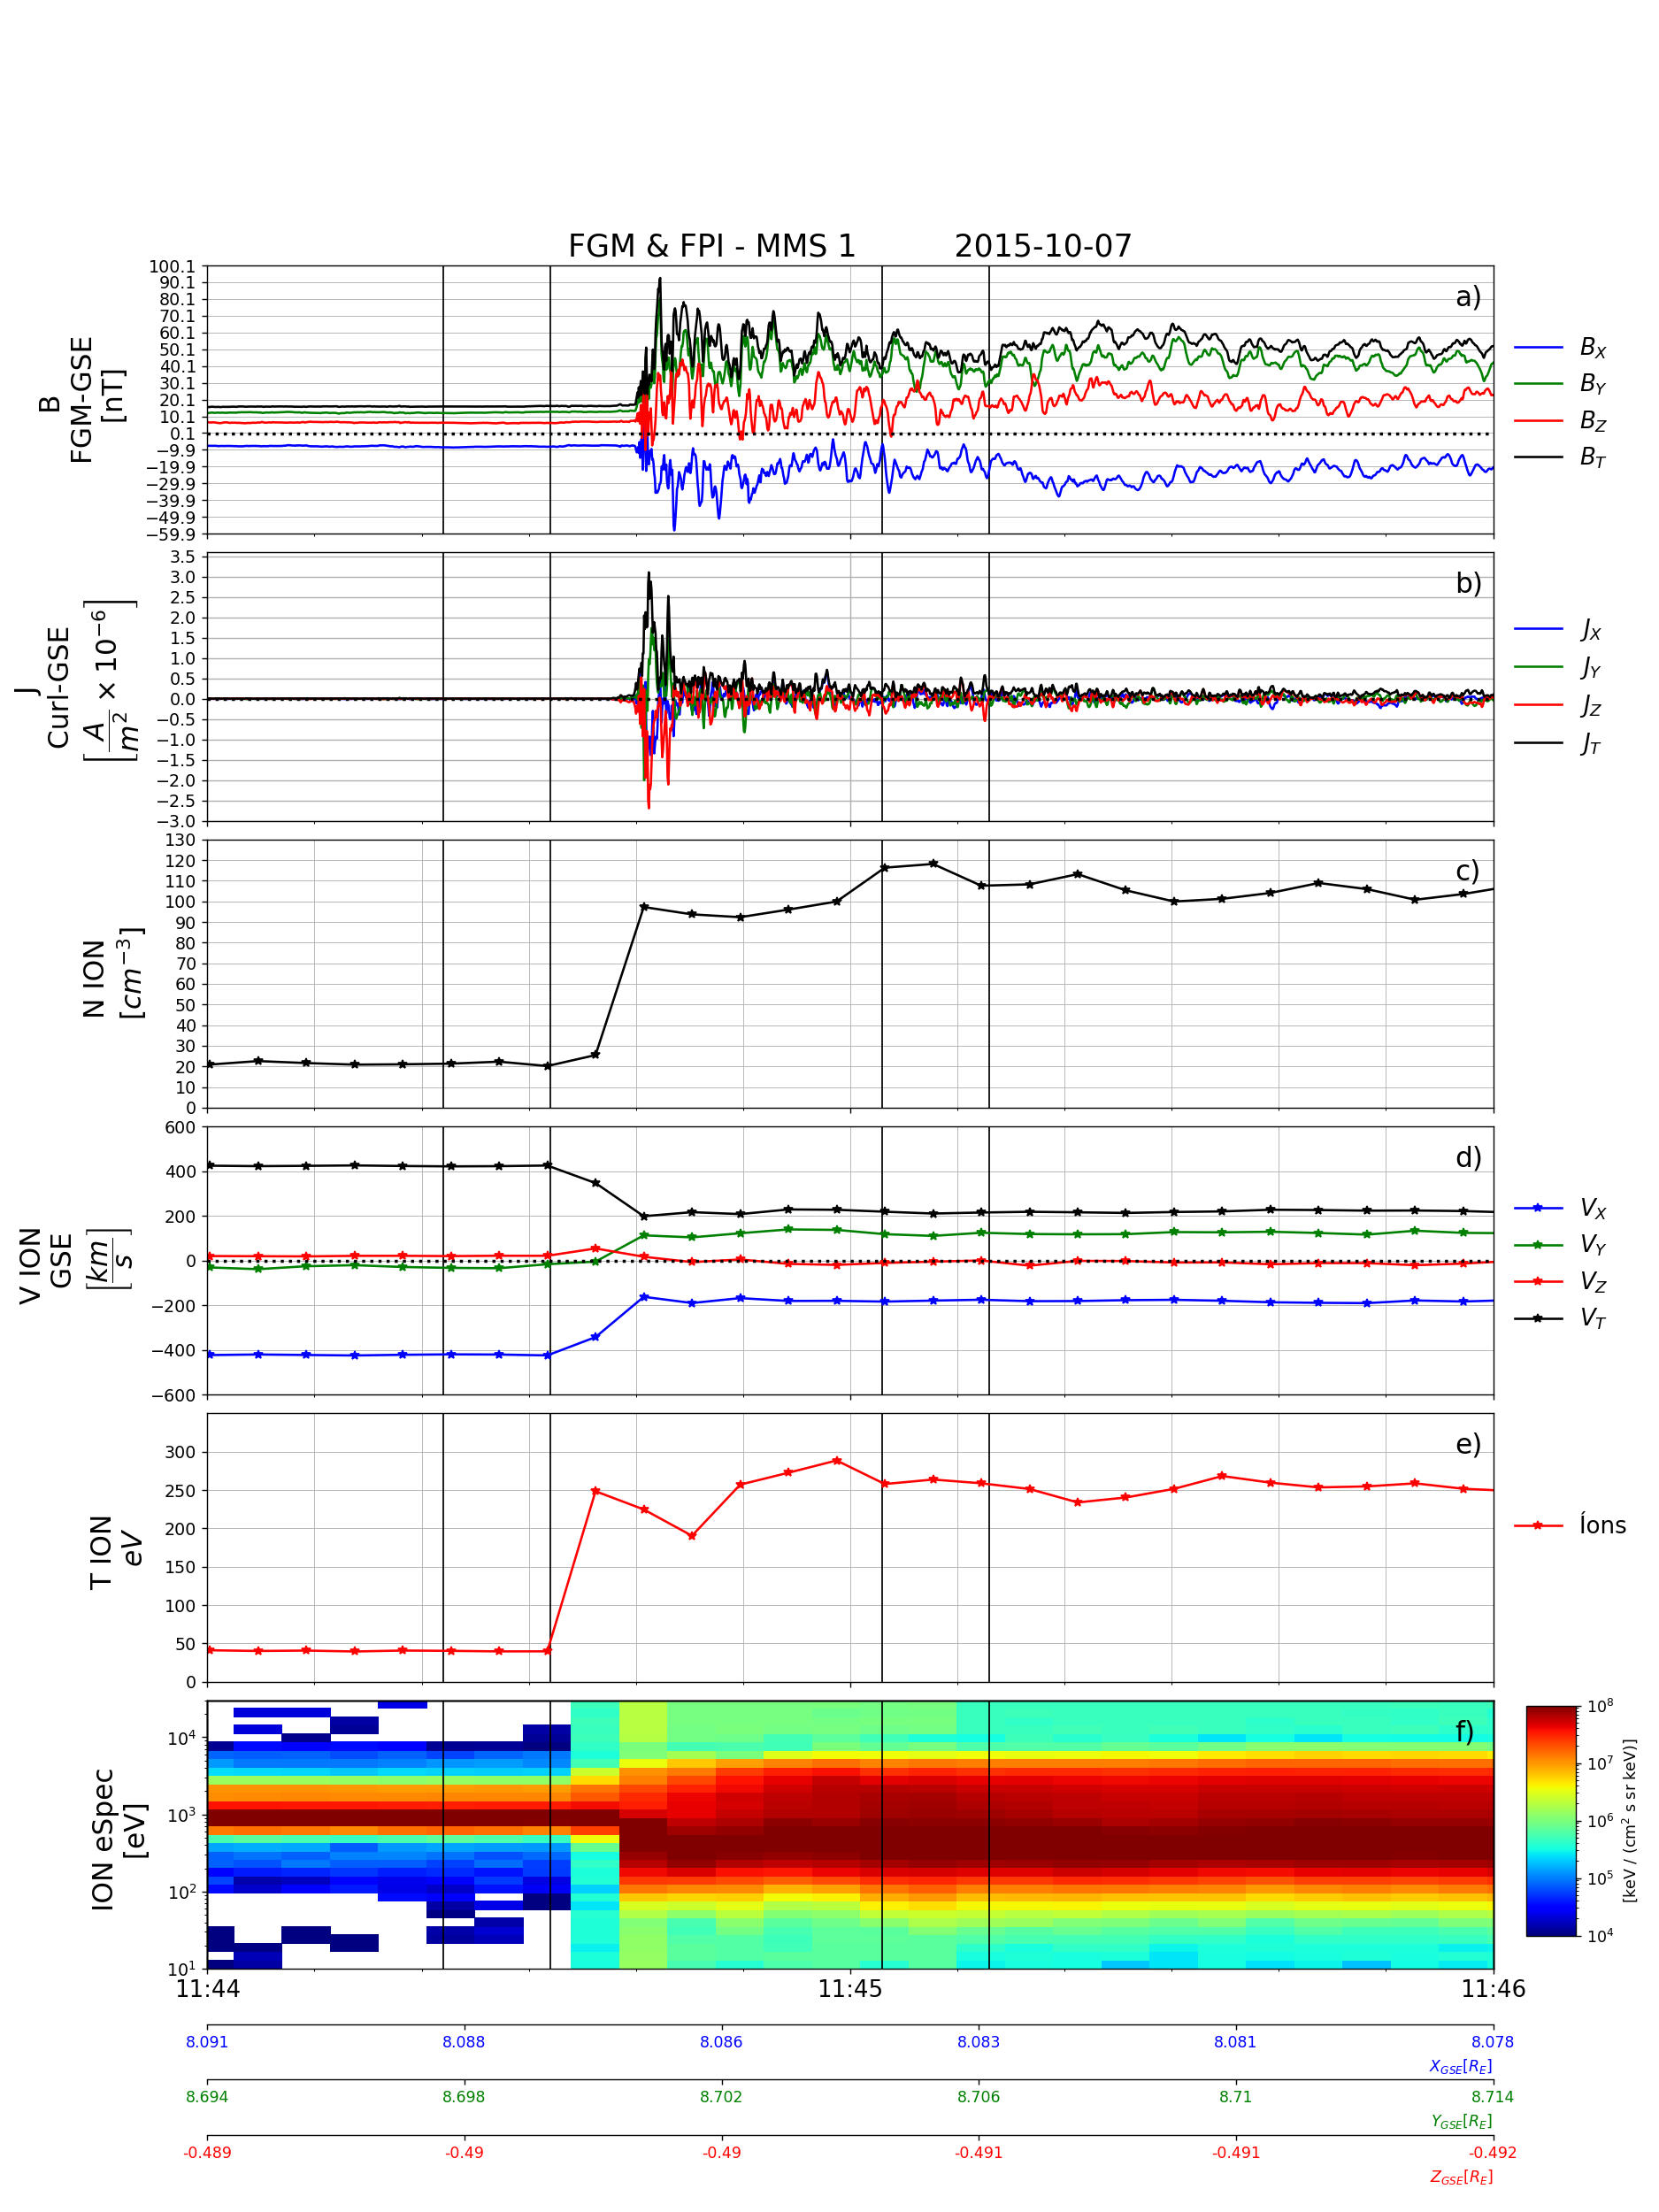

20-Jul-23 15:32:07: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2343326762.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2.set_xticklabels(pos1_r[:,0], color='blue')

20-Jul-23 15:32:07: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2343326762.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs3.set_xticklabels(pos1_r[:,1], color='green')

20-Jul-23 15:32:07: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2343326762.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs4.set_xticklabels(pos1_r[:,2], color='red')



In [59]:
#Plot 
nxs = 6
plt.rcParams['axes.autolimit_mode'] = 'round_numbers' #Arredondar os ticks das extremidades

fig, axs = plt.subplots(nxs, gridspec_kw={'hspace': 0.07},figsize=(15,20))
axs[0].set_title('FGM & FPI - MMS 1'+10*' '+ttext[0],size = 20)

seconds = md.SecondLocator(interval=10)   
minutes = md.MinuteLocator(interval=1)  
formatter = md.DateFormatter('%H:%M')  #'%H.%M'

for n in range(0,nxs):   
    # Barras verticais
    axs[n].axvline(tb_i1 , color='black',lw=1)
    axs[n].axvline(tb_s1 , color='black',lw=1)
    
    axs[n].axvline(tb_i2 , color='black',lw=1)
    axs[n].axvline(tb_s2 , color='black',lw=1)
    
    # Eixo x
    axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    
    #Aumento do tamanho do label dos gráficos
    axs[n].tick_params(axis='x',labelsize=15)
    axs[n].tick_params(axis='y',labelsize=11)
    
    axs[n].label_outer()
    
if plt_todos.lower() == 's':
    
    # Componentes do campo magnético
    axs[0].plot(t1, b1[:,0], color='blue' ,label= r'$B_X$')
    axs[0].plot(t1, b1[:,1], color='green',label= r'$B_Y$')
    axs[0].plot(t1, b1[:,2], color='red'  ,label= r'$B_Z$')
    
    # Componentes da densidade de corrente
    axs[1].plot(t1_j, j[:,0]/1e-6, color='blue' ,label= r'$J_X$')
    axs[1].plot(t1_j, j[:,1]/1e-6, color='green',label= r'$J_Y$')
    axs[1].plot(t1_j, j[:,2]/1e-6, color='red'  ,label= r'$J_Z$')
    
    # Componentes da velocidade dos íons
    axs[3].plot(t1_v, v1[:,0],'-*', color='blue' , label= r'$V_X$')
    axs[3].plot(t1_v, v1[:,1],'-*', color='green', label= r'$V_Y$')
    axs[3].plot(t1_v, v1[:,2],'-*', color='red'  , label= r'$V_Z$')
    
    
    
# Plot do campo magnético total
axs[0].plot(t1, b1[:,3], color='black',label= r'$B_T$')
axs[0].axhline(0, color='black',lw = 2,linestyle=":")

axs[0].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[0].set_ylabel('B \n FGM-GSE \n [nT]', labelpad=10,size = 18)
axs[0].annotate('a)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[0].grid(linewidth=0.5)
axs[0].set_yticks(np.arange(-59.9, 101, 10))
axs[0].set_ylim([-59.9,100.1])


#Plot do j_total
axs[1].plot(t1_j, j_t[:]/1e-6, color='black',label= r'$J_T$')
axs[1].axhline(0, color='black',lw = 2,linestyle=":")

axs[1].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[1].set_ylabel('J \n Curl-GSE \n '+r'$\left[\dfrac{A}{m^2} \times 10^{-6}\right]$',labelpad=10, size = 18)
axs[1].annotate('b)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[1].grid()
axs[1].set_yticks(np.arange(-3., 3.6, 0.5))
axs[1].set_ylim([-3,3.6])

#Plot de densidade
axs[2].plot(t1_d, d1,'-*', color='black')

axs[2].set_ylabel('N ION \n'+ r'$\left[ cm^{-3} \right]$',labelpad=10, size = 18)
axs[2].annotate('c)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[2].set_ylim([0,130])
axs[2].set_yticks(np.arange(0,131,10))
axs[2].grid(which='both',linewidth=0.5)

# Plot da velocidade
axs[3].plot(t1_v, v1_t[:],'-*', color='black', label= r'$V_T$')

axs[3].legend(loc=(1.01,.2),title= '', frameon = False, prop={'size':15})
axs[3].set_ylabel('V ION \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 18)
axs[3].annotate('d)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[3].grid(which='both',linewidth=0.5)
axs[3].axhline(0, color='black',lw = 2,linestyle=":")

# Plot da temperatura dos íons e dos elétrons
axs[4].plot(t1_d, dis_T,'-*',color='red', label='Íons')
#axs[4].plot(t1_d, dis_T*11600/1e6,'-*',color='red', label='Íons')
#axs[4].plot(t1_d, des_T*11600/1e6,'-*',color='blue',label='Elétrons')

#axs[4].set_ylabel('T ION \n'+ r'$\left[ \times 10^6  K \right]$',labelpad=10, size = 18)
axs[4].set_ylabel('T ION \n'+ r'$eV$',labelpad=10, size = 18)
axs[4].annotate('e)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[4].legend(loc=(1.01,.5) ,title= '',frameon = False, prop={'size':15})
axs[4].grid(which='both',linewidth=0.5)

#axs[4].set_ylim([0,4])
#axs[4].set_yticks(np.arange(0,4.1,0.5))
axs[4].set_ylim([0,350])
axs[4].set_yticks(np.arange(0,350,50))

# Plot do espectro de energia

c = axs[5].pcolor(t1_en,np.transpose(energy1_i),np.transpose(data1_i), shading='auto', 
                  norm=LogNorm(vmin=1e4, vmax=1e8), cmap='jet')
axs[5].set_yscale('log') 
axs[5].set_ylabel('ION eSpec \n [eV]',labelpad=10, size = 18)
axs[5].annotate('f)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[5].set_ylim([10e0,3*1e4])

cbaxes = fig.add_axes([0.92, 0.125, 0.03, 0.104]) 
fig.colorbar(c, ax = axs[3], cax = cbaxes, label = '[keV / '+ r'(cm$^2$ s sr keV)]') 

################################# Configuração dos eixos de posição da sonda 

axs2 = axs[5].twiny()
axs2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axs2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs2.spines['bottom'].set_position(('outward', 36))
axs2.set_xticklabels(pos1_r[:,0], color='blue')
axs2.set_xlabel(r'$X_{GSE}[R_E]$', loc='right', color='blue')

axs3 = axs2.twiny()
axs3.xaxis.set_ticks_position('bottom')
axs3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs3.spines['bottom'].set_position(('outward', 72))

axs3.set_xticklabels(pos1_r[:,1], color='green')
axs3.set_xlabel(r'$Y_{GSE}[R_E]$', loc='right', color= 'green')

axs4 = axs3.twiny()
axs4.xaxis.set_ticks_position('bottom')
axs4.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs4.spines['bottom'].set_position(('outward', 108))
axs4.set_xticklabels(pos1_r[:,2], color='red')
axs4.set_xlabel(r'$Z_{GSE}[R_E]$', loc='right',color='red')

#plt.savefig('MMS1_comJ.png', dpi=300, bbox_inches = 'tight')   # Salvamento da figura
plt.show()

* ## Região pré-shock (1)

* ## Achar os índices

In [60]:
def IVal(v,init,fim):
    
    tam = len(v)
    t   = np.zeros((tam, 2))
    i   = np.zeros((1, 2))
    
    for ii in range(tam):
        
        t[ii, 0] = np.abs(init - v[ii])
        t[ii, 1] = np.abs(fim - v[ii])   
    
    i[0,0] = t[:,0].argmin()
    i[0,1] = t[:,1].argmin()
    
    return i

In [61]:
tim = [t1, t1_d, t1_v, t1_j, t_p1]

ips1 = np.zeros((len(tim),2))

for m in range(len(tim)):
    
    ips1[m] = IVal(tim[m], tb_i1, tb_s1)

* ## Médias 

In [62]:
b1_m  = [ np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,0]),
          np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,1]),
          np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,2])
                                         ]
B1_m  = np.mean(b1[ round(ips1[0][0]): round(ips1[0][1])+1,3])

v1_m  = [np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,0]),
          np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,1]),
          np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,2])
                                         ]
v1_tm  = np.mean(v1_t[round(ips1[2][0]):round(ips1[2][1])+1])

d1_m  = np.mean(d1[round(ips1[1][0]):round(ips1[1][1])+1])
T1_mi = np.mean(dis_T[round(ips1[1][0]):round(ips1[1][1])+1])
T1_me = np.mean(des_T[round(ips1[1][0]):round(ips1[1][1])+1])

pos1_mr  = pos1_r[round(ips1[-1][0]),:]

* ## Região pós-shock (2)

* ## Achar os índices

In [63]:
tim = [t1, t1_d, t1_v, t1_j, t_p1]

ips2 = np.zeros((len(tim),2))

for m in range(len(tim)):
    
    ips2[m] = IVal(tim[m], tb_i2, tb_s2)

* ## Médias 

In [64]:
b2_m  = [np.mean( b1[round(ips2[0][0]): round(ips2[0][1])+1,0]),
          np.mean(b1[round(ips2[0][0]): round(ips2[0][1])+1,1]),
          np.mean(b1[round(ips2[0][0]): round(ips2[0][1])+1,2])
                                         ]
B2_m  = np.mean(b1[ round(ips2[0][0]): round(ips2[0][1])+1,3])

v2_m  = [np.mean( v1[round(ips2[2][0]): round(ips2[2][1])+1,0]),
          np.mean(v1[round(ips2[2][0]): round(ips2[2][1])+1,1]),
          np.mean(v1[round(ips2[2][0]): round(ips2[2][1])+1,2])
                                         ]
v2_tm  = np.mean(v1_t[round(ips2[2][0]):round(ips2[2][1])+1])

d2_m  = np.mean(d1[round(ips2[1][0]):round(ips2[1][1])+1])
T2_mi = np.mean(dis_T[round(ips2[1][0]):round(ips2[1][1])+1])
T2_me = np.mean(des_T[round(ips2[1][0]):round(ips2[1][1])+1])

pos2_mr  = pos1_r[round(ips2[-1][0]),:]

# Resumo 

In [65]:
print('---------------------------------Valores no vento solar [1]-----------------------------------------')
print('------------------------------------------------------------------------------------------------')
print('Bx[nT]\t By[nT]\t Bz[nT]\t Bt[nT]\t d[cm^-3]   T[eV]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]')
print('------------------------------------------------------------------------------------------------')
print('%2.2f  \t%  2.2f \t%2.2f \t %2.2f \t   %2.2f   %2.2e   %2.2f    %2.2f   %2.2f    %2.2f'%(b1_m[0],
                                                                                                b1_m[1],
                                                                                                b1_m[2],
                                                                                                B1_m,
                                                                                                d1_m,
                                                                                                T1_mi,
                                                                                                v1_m[0],
                                                                                                v1_m[1],
                                                                                                v1_m[2],
                                                                                                v1_tm))

---------------------------------Valores no vento solar [1]-----------------------------------------
------------------------------------------------------------------------------------------------
Bx[nT]	 By[nT]	 Bz[nT]	 Bt[nT]	 d[cm^-3]   T[eV]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]
------------------------------------------------------------------------------------------------
-8.03  	 12.40 	6.12 	 16.00 	   21.27   3.98e+01   -421.46    -27.80   20.91    422.97


In [66]:
print('-------------------------------Valores na bainha magnética [2]--------------------------------------')
print('------------------------------------------------------------------------------------------------')
print('Bx[nT]\t By[nT]\t Bz[nT]\t Bt[nT]\t d[cm^-3]   T[eV]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]')
print('------------------------------------------------------------------------------------------------')
print('%2.2f   %2.2f \t %2.2f\t %2.2f\t   %2.2f   %2.2e  %2.2f   %2.2f    %2.2f     %2.2f'%(b2_m[0],
                                                                                            b2_m[1],
                                                                                            b2_m[2],
                                                                                            B2_m,
                                                                                            d2_m,
                                                                                            T2_mi,
                                                                                            v2_m[0],
                                                                                            v2_m[1],
                                                                                            v2_m[2],
                                                                                            v2_tm))

-------------------------------Valores na bainha magnética [2]--------------------------------------
------------------------------------------------------------------------------------------------
Bx[nT]	 By[nT]	 Bz[nT]	 Bt[nT]	 d[cm^-3]   T[eV]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]
------------------------------------------------------------------------------------------------
-19.47   39.16 	 17.28	 48.03	   114.00   2.60e+02  -179.33   117.61    -5.07     214.64


* ## $[B]= B_2 - B_1$

In [67]:
DB = np.array(b2_m)-np.array(b1_m)
DB

array([-11.437742,  26.758911,  11.15679 ], dtype=float32)

* ## $[V] = V_2 - V_1$

In [68]:
DV = np.array(v2_m)-np.array(v1_m)
DV

array([242.12807 , 145.40767 , -25.975906], dtype=float32)

* # Cálculo do vetor normal $n$ (usando $[B]$, $[V]$ e $[B]$)
    ## Mixed data 3

In [69]:
n   = np.cross(np.cross(DB,DV),DB)
n_m = n/np.linalg.norm(n)

n_m

array([ 0.8921752 ,  0.43381014, -0.12582624], dtype=float32)

In [70]:
cos_m = np.dot(n_m, b1_m)/(B1_m)
o_nm  = np.arccos(cos_m)*(180/np.pi)

round(180 - o_nm,3)

80.806

In [71]:
180-round(o_nm, 3)

80.806

In [72]:
cos_m = np.dot(n_m, b1_m)/( np.sqrt(b1_m[0]**2+b1_m[1]**2+b1_m[2]**2) )
o_nm  = np.arccos(cos_m)*(180/np.pi)

round(180 - o_nm,3)

80.805

## Adicionais 

In [73]:
plt_todos = str(input('Exibir as componentes de B, V e J ? (S/N): '))   
# "s" para plotar todas as componentes de campo magnético, velocidade e densidade de corrente.

Exibir as componentes de B, V e J ? (S/N): N


<IPython.core.display.Javascript object>


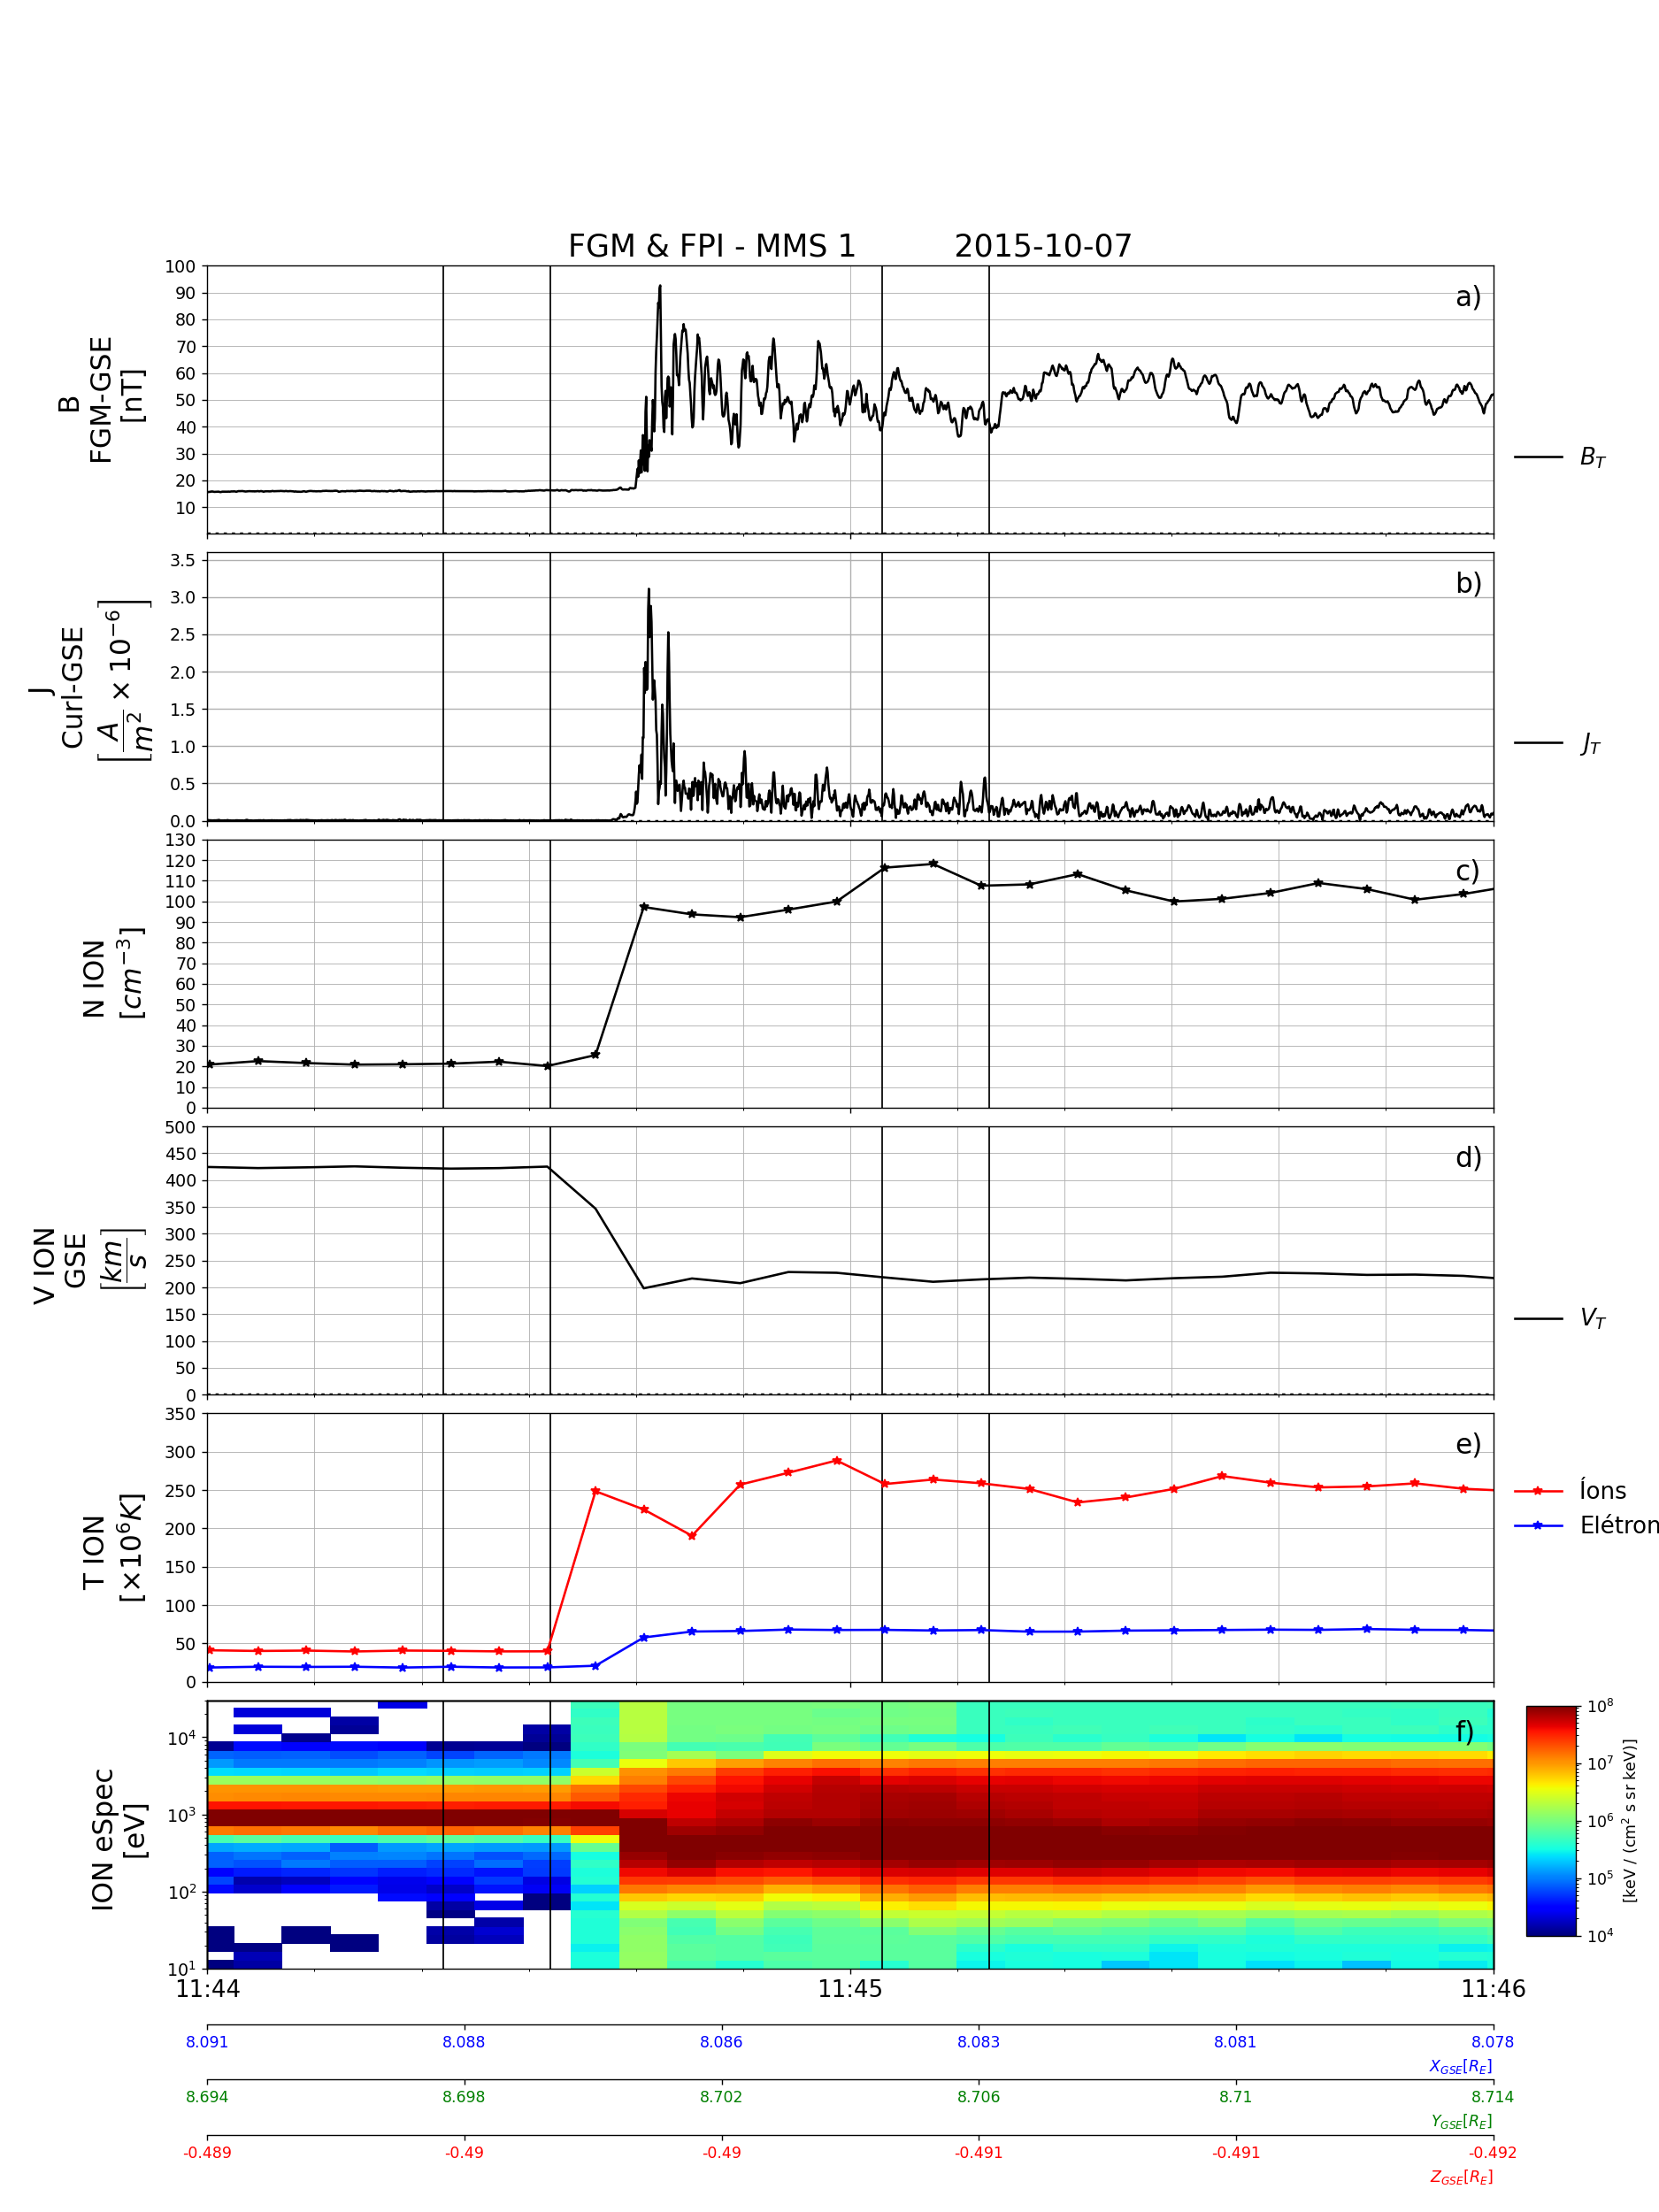

20-Jul-23 15:33:49: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2539507592.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2.set_xticklabels(pos1_r[:,0], color='blue')

20-Jul-23 15:33:49: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2539507592.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs3.set_xticklabels(pos1_r[:,1], color='green')

20-Jul-23 15:33:49: C:\Users\mathe\AppData\Local\Temp\ipykernel_17328\2539507592.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs4.set_xticklabels(pos1_r[:,2], color='red')



In [74]:
#Plot 
nxs = 6
plt.rcParams['axes.autolimit_mode'] = 'round_numbers' #Arredondar os ticks das extremidades

fig, axs = plt.subplots(nxs, gridspec_kw={'hspace': 0.07},figsize=(15,20))
axs[0].set_title('FGM & FPI - MMS 1'+10*' '+ttext[0],size = 20)

seconds = md.SecondLocator(interval=10)   
minutes = md.MinuteLocator(interval=1)  
formatter = md.DateFormatter('%H:%M')  #'%H.%M'

for n in range(0,nxs):   
    # Barras verticais
    axs[n].axvline(tb_i1 , color='black',lw=1)
    axs[n].axvline(tb_s1 , color='black',lw=1)
    
    axs[n].axvline(tb_i2 , color='black',lw=1)
    axs[n].axvline(tb_s2 , color='black',lw=1)
    
    # Eixo x
    axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    
    #Aumento do tamanho do label dos gráficos
    axs[n].tick_params(axis='x',labelsize=15)
    axs[n].tick_params(axis='y',labelsize=11)
    
    axs[n].label_outer()
    
if plt_todos.lower() == 's':
    
    # Componentes do campo magnético
    axs[0].plot(t1, b1[:,0], color='blue' ,label= r'$B_X$')
    axs[0].plot(t1, b1[:,1], color='green',label= r'$B_Y$')
    axs[0].plot(t1, b1[:,2], color='red'  ,label= r'$B_Z$')
    
    # Componentes da densidade de corrente
    axs[1].plot(t1_j, j[:,0]/1e-6, color='blue' ,label= r'$J_X$')
    axs[1].plot(t1_j, j[:,1]/1e-6, color='green',label= r'$J_Y$')
    axs[1].plot(t1_j, j[:,2]/1e-6, color='red'  ,label= r'$J_Z$')
    
    # Componentes da velocidade dos íons
    axs[3].plot(t1_v, v1[:,0], color='blue' , label= r'$V_X$')
    axs[3].plot(t1_v, v1[:,1], color='green', label= r'$V_Y$')
    axs[3].plot(t1_v, v1[:,2], color='red'  , label= r'$V_Z$')
    
    
    
# Plot do campo magnético total
axs[0].plot(t1, b1[:,3], color='black',label= r'$B_T$')
axs[0].axhline(0, color='black',lw = 2,linestyle=":")

axs[0].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[0].set_ylabel('B \n FGM-GSE \n [nT]', labelpad=10,size = 18)
axs[0].annotate('a)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[0].grid(linewidth=0.5)
axs[0].set_yticks(np.arange(0.0, 100.1, 10))
axs[0].set_ylim([0.1,100.1])


#Plot do j_total
axs[1].plot(t1_j, j_t[:]/1e-6, color='black',label= r'$J_T$')
axs[1].axhline(0, color='black',lw = 2,linestyle=":")

axs[1].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[1].set_ylabel('J \n Curl-GSE \n '+r'$\left[\dfrac{A}{m^2} \times 10^{-6}\right]$',labelpad=10, size = 18)
axs[1].annotate('b)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[1].grid()
axs[1].set_yticks(np.arange(0, 3.6, 0.5))
axs[1].set_ylim([0,3.6])

#Plot de densidade
axs[2].plot(t1_d, d1,'-*', color='black')

axs[2].set_ylabel('N ION \n'+ r'$\left[ cm^{-3} \right]$',labelpad=10, size = 18)
axs[2].annotate('c)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[2].set_ylim([0,130])
axs[2].set_yticks(np.arange(0,130.1,10))
axs[2].grid(which='both',linewidth=0.5)

# Plot da velocidade
axs[3].plot(t1_v, v1_t[:], color='black', label= r'$V_T$')

axs[3].legend(loc=(1.01,.2),title= '', frameon = False, prop={'size':15})
axs[3].set_ylabel('V ION \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 18)
axs[3].annotate('d)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[3].grid(which='both',linewidth=0.5)
axs[3].axhline(0, color='black',lw = 2,linestyle=":")

axs[3].set_ylim([0,500])
axs[3].set_yticks(np.arange(0,500.1,50))

# Plot da temperatura dos íons e dos elétrons
axs[4].plot(t1_d, dis_T,'-*',color='red', label='Íons')
axs[4].plot(t1_d, des_T,'-*',color='blue',label='Elétrons')

axs[4].set_ylabel('T ION \n'+ r'$\left[ \times 10^6  K \right]$',labelpad=10, size = 18)
axs[4].annotate('e)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[4].legend(loc=(1.01,.5) ,title= '',frameon = False, prop={'size':15})
axs[4].grid(which='both',linewidth=0.5)

axs[4].set_ylim([0,350])
axs[4].set_yticks(np.arange(0,350.1,50))
#axs[4].set_ylim([0,8])
#axs[4].set_yticks(np.arange(0,8.1,0.5))

# Plot do espectro de energia

c = axs[5].pcolor(t1_en,np.transpose(energy1_i),np.transpose(data1_i), shading='auto',
                  norm=LogNorm(vmin=1e4, vmax=1e8), cmap='jet')
axs[5].set_yscale('log') 
axs[5].set_ylabel('ION eSpec \n [eV]',labelpad=10, size = 18)
axs[5].annotate('f)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[5].set_ylim([10e0,3*1e4])

cbaxes = fig.add_axes([0.92, 0.125, 0.03, 0.104]) 
fig.colorbar(c, ax = axs[3], cax = cbaxes, label = '[keV / '+ r'(cm$^2$ s sr keV)]') 

################################# Configuração dos eixos de posição da sonda 

axs2 = axs[5].twiny()
axs2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axs2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs2.spines['bottom'].set_position(('outward', 36))
axs2.set_xticklabels(pos1_r[:,0], color='blue')
axs2.set_xlabel(r'$X_{GSE}[R_E]$', loc='right', color='blue')

axs3 = axs2.twiny()
axs3.xaxis.set_ticks_position('bottom')
axs3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs3.spines['bottom'].set_position(('outward', 72))

axs3.set_xticklabels(pos1_r[:,1], color='green')
axs3.set_xlabel(r'$Y_{GSE}[R_E]$', loc='right', color= 'green')

axs4 = axs3.twiny()
axs4.xaxis.set_ticks_position('bottom')
axs4.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs4.spines['bottom'].set_position(('outward', 108))
axs4.set_xticklabels(pos1_r[:,2], color='red')
axs4.set_xlabel(r'$Z_{GSE}[R_E]$', loc='right',color='red')

#plt.savefig('MMS1_comJ.png', dpi=300, bbox_inches = 'tight')   # Salvamento da figura
plt.show()

# Tabelas 

In [75]:
b1_m[0] = round(b1_m[0], 3); 
b1_m[1] = round(b1_m[1], 3); 
b1_m[2] = round(b1_m[2], 3); 
B1_m = round(B1_m,3);  
d1_m = round(d1_m ,3)
v1_m[0] = round(v1_m[0], 3);
v1_m[1] = round(v1_m[1], 3); 
v1_m[2] = round(v1_m[2], 3); 
v1_tm= round(v1_tm,3); 
T1_mi = round(T1_mi, 3)

b2_m[0] = round(b2_m[0], 3);
b2_m[1] = round(b2_m[1], 3);
b2_m[2] = round(b2_m[2], 3); 
B2_m = round(B2_m,3);  
d2_m = round(d2_m ,3)
v2_m[0] = round(v2_m[0], 3);
v2_m[1] = round(v2_m[1], 3); 
v2_m[2] = round(v2_m[2], 3);
v2_tm= round(v2_tm,3); 
T2_mi = round(T2_mi, 3)

In [76]:
A12 = [[b1_m[0],b1_m[1],b1_m[2],B1_m,d1_m,T1_mi,v1_m[0],v1_m[1],v1_m[2],v1_tm], 
       [b2_m[0],b2_m[1],b2_m[2],B2_m,d2_m,T2_mi,v2_m[0],v2_m[1],v2_m[2],v2_tm],
       [b2_m[0]-b1_m[0],b2_m[1]-b1_m[1],b2_m[2]-b1_m[2],B2_m-B1_m,d2_m-d1_m,
        T2_mi-T1_mi,v2_m[0]-v1_m[0],v2_m[1]-v1_m[1],v2_m[2]-v1_m[2],v2_tm-v1_tm]]




df1 = pd.DataFrame(A12, columns = ['Bx[nT]', 'By[nT]', 'Bz[nT]', 'Bt[nT]', 'd[cm^-3]', 
                                   'T[eV]', 'Vx[km/s]', 'Vy[km/s]', 'Vz[km/s]', 'VT[km/s]' ], 
                                    index=['(1)', '(2)', '(2)-(1)'])
df1

,Bx[nT],By[nT],Bz[nT],Bt[nT],d[cm^-3],T[eV],Vx[km/s],Vy[km/s],Vz[km/s],VT[km/s]
(1),-8.032000,12.403000,6.124,15.999000,21.268999,39.785000,-421.458008,-27.801001,20.910,422.971
(2),-19.469999,39.161999,17.281,48.026001,114.003998,260.183990,-179.330002,117.607002,-5.066,214.638
(2)-(1),-11.438000,26.758999,11.157,32.027000,92.735001,220.398987,242.128006,145.408005,-25.976,-208.333


In [54]:
df1[['Bx[nT]', 'By[nT]', 'Bz[nT]', 'Bt[nT]', 'd[cm^-3]', 'T[eV]', 'Vx[km/s]', 'Vy[km/s]', 'Vz[km/s]', 
     'VT[km/s]']].rename(
    columns = {'Bx[nT]':r"$B_x [nT]$", 'By[nT]':r"$B_y [nT]$", 'Bz[nT]':r"$B_z [nT]$", 'Bt[nT]':r"$B_T [nT]$",
               'd[cm^-3]':r"$d [cm^{-3}]$", 'T[eV]':r"$T [eV]$", 'Vx[km/s]':r"$ V_x \left[ \dfrac{km}{s} \right]$",
               'Vy[km/s]':r"$ V_y \left[ \dfrac{km}{s} \right]$",'Vz[km/s]':r"$ V_z \left[ \dfrac{km}{s} \right]$",
               'VT[km/s]':r"$ V_T\left[ \dfrac{km}{s} \right]$"
              }).to_latex('Tabela_dissertação_dados_eventos.tex', 
                caption = 'Valores mensurados pela MMS1 nas regiões pré-choque e pós-choque para o Evento do 07/10/2015',
                column_format ='c|cccccccccc',
                escape = False)